In [319]:
import pandas as pd
import os
import json
from datetime import datetime, timedelta, date
import time
import requests

In [49]:
with open('dump/2020-04-24_id_2129.json') as f:
    data = json.load(f)
print(data)

{'current': {'fromDateTime': '2020-04-24T07:20:22.367Z', 'tillDateTime': '2020-04-24T08:20:22.367Z', 'values': [{'name': 'PM1', 'value': 6.22}, {'name': 'PM25', 'value': 8.73}, {'name': 'PM10', 'value': 11.82}, {'name': 'PRESSURE', 'value': 1011.38}, {'name': 'HUMIDITY', 'value': 56.31}, {'name': 'TEMPERATURE', 'value': 14.77}], 'indexes': [{'name': 'AIRLY_CAQI', 'value': 14.55, 'level': 'VERY_LOW', 'description': 'Great air here today!', 'advice': 'Green equals clean!', 'color': '#6BC926'}], 'standards': [{'name': 'WHO', 'pollutant': 'PM25', 'limit': 25.0, 'percent': 34.92, 'averaging': '24h'}, {'name': 'WHO', 'pollutant': 'PM10', 'limit': 50.0, 'percent': 23.65, 'averaging': '24h'}]}, 'history': [{'fromDateTime': '2020-04-23T08:00:00.000Z', 'tillDateTime': '2020-04-23T09:00:00.000Z', 'values': [{'name': 'PM1', 'value': 2.46}, {'name': 'PM25', 'value': 3.54}, {'name': 'PM10', 'value': 4.7}, {'name': 'PRESSURE', 'value': 1024.14}, {'name': 'HUMIDITY', 'value': 56.42}, {'name': 'TEMPERA

In [125]:
pd.DataFrame(json_normalize(data))

,history,forecast,current.fromDateTime,current.tillDateTime,current.values,current.indexes,current.standards
0,"[{'fromDateTime': '2020-04-23T08:00:00.000Z', ...","[{'fromDateTime': '2020-04-24T08:00:00.000Z', ...",2020-04-24T07:20:22.367Z,2020-04-24T08:20:22.367Z,"[{'name': 'PM1', 'value': 6.22}, {'name': 'PM2...","[{'name': 'AIRLY_CAQI', 'value': 14.55, 'level...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."


In [126]:
pd.DataFrame(json_normalize(data['history']))

,fromDateTime,tillDateTime,values,indexes,standards
0,2020-04-23T08:00:00.000Z,2020-04-23T09:00:00.000Z,"[{'name': 'PM1', 'value': 2.46}, {'name': 'PM2...","[{'name': 'AIRLY_CAQI', 'value': 5.89, 'level'...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
1,2020-04-23T09:00:00.000Z,2020-04-23T10:00:00.000Z,"[{'name': 'PM1', 'value': 1.33}, {'name': 'PM2...","[{'name': 'AIRLY_CAQI', 'value': 3.11, 'level'...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
2,2020-04-23T10:00:00.000Z,2020-04-23T11:00:00.000Z,"[{'name': 'PM1', 'value': 1.2}, {'name': 'PM25...","[{'name': 'AIRLY_CAQI', 'value': 2.97, 'level'...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
3,2020-04-23T11:00:00.000Z,2020-04-23T12:00:00.000Z,"[{'name': 'PM1', 'value': 1.67}, {'name': 'PM2...","[{'name': 'AIRLY_CAQI', 'value': 4.07, 'level'...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
4,2020-04-23T12:00:00.000Z,2020-04-23T13:00:00.000Z,"[{'name': 'PM1', 'value': 1.72}, {'name': 'PM2...","[{'name': 'AIRLY_CAQI', 'value': 4.1, 'level':...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
5,2020-04-23T13:00:00.000Z,2020-04-23T14:00:00.000Z,"[{'name': 'PM1', 'value': 1.35}, {'name': 'PM2...","[{'name': 'AIRLY_CAQI', 'value': 3.43, 'level'...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
6,2020-04-23T14:00:00.000Z,2020-04-23T15:00:00.000Z,"[{'name': 'PM1', 'value': 0.9}, {'name': 'PM25...","[{'name': 'AIRLY_CAQI', 'value': 2.6, 'level':...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
7,2020-04-23T15:00:00.000Z,2020-04-23T16:00:00.000Z,"[{'name': 'PM1', 'value': 0.68}, {'name': 'PM2...","[{'name': 'AIRLY_CAQI', 'value': 2.17, 'level'...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
8,2020-04-23T16:00:00.000Z,2020-04-23T17:00:00.000Z,"[{'name': 'PM1', 'value': 1.11}, {'name': 'PM2...","[{'name': 'AIRLY_CAQI', 'value': 2.84, 'level'...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
9,2020-04-23T17:00:00.000Z,2020-04-23T18:00:00.000Z,"[{'name': 'PM1', 'value': 2.36}, {'name': 'PM2...","[{'name': 'AIRLY_CAQI', 'value': 5.85, 'level'...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."


In [50]:
# read to list all file name in directory
files = [file for file in os.listdir('./dump') ]
files

['2020-03-25_id_10218.json',
 '2020-03-25_id_10238.json',
 '2020-03-25_id_10243.json',
 '2020-03-25_id_10481.json',
 '2020-03-25_id_1106.json',
 '2020-03-25_id_11210.json',
 '2020-03-25_id_11211.json',
 '2020-03-25_id_11905.json',
 '2020-03-25_id_2067.json',
 '2020-03-25_id_2129.json',
 '2020-03-25_id_22.json',
 '2020-03-25_id_2214.json',
 '2020-03-25_id_2244.json',
 '2020-03-25_id_2340.json',
 '2020-03-25_id_2363.json',
 '2020-03-25_id_2733.json',
 '2020-03-25_id_2769.json',
 '2020-03-25_id_2875.json',
 '2020-03-25_id_2991.json',
 '2020-03-25_id_3041.json',
 '2020-03-25_id_3281.json',
 '2020-03-25_id_3357.json',
 '2020-03-25_id_337.json',
 '2020-03-25_id_3431.json',
 '2020-03-25_id_3440.json',
 '2020-03-25_id_360.json',
 '2020-03-25_id_6170.json',
 '2020-03-25_id_6566.json',
 '2020-03-25_id_6585.json',
 '2020-03-25_id_6589.json',
 '2020-03-25_id_6597.json',
 '2020-03-25_id_6598.json',
 '2020-03-25_id_6599.json',
 '2020-03-25_id_6626.json',
 '2020-03-25_id_6859.json',
 '2020-03-25_id_6

In [52]:
len(files)

18409

In [58]:
files_id = [s for s in files if "id_9942" in s]
print(len(files_id))
files_id


236


['2020-03-25_id_9942.json',
 '2020-03-26_id_9942.json',
 '2020-03-27_id_9942.json',
 '2020-03-29_id_9942.json',
 '2020-03-30_id_9942.json',
 '2020-03-31_id_9942.json',
 '2020-04-01_id_9942.json',
 '2020-04-02_id_9942.json',
 '2020-04-03_id_9942.json',
 '2020-04-04_id_9942.json',
 '2020-04-06_id_9942.json',
 '2020-04-07_id_9942.json',
 '2020-04-08_id_9942.json',
 '2020-04-09_id_9942.json',
 '2020-04-10_id_9942.json',
 '2020-04-11_id_9942.json',
 '2020-04-12_id_9942.json',
 '2020-04-13_id_9942.json',
 '2020-04-14_id_9942.json',
 '2020-04-15_id_9942.json',
 '2020-04-16_id_9942.json',
 '2020-04-17_id_9942.json',
 '2020-04-18_id_9942.json',
 '2020-04-19_id_9942.json',
 '2020-04-20_id_9942.json',
 '2020-04-21_id_9942.json',
 '2020-04-22_id_9942.json',
 '2020-04-23_id_9942.json',
 '2020-04-24_id_9942.json',
 '2020-04-25_id_9942.json',
 '2020-04-26_id_9942.json',
 '2020-04-27_id_9942.json',
 '2020-04-28_id_9942.json',
 '2020-04-29_id_9942.json',
 '2020-04-30_id_9942.json',
 '2020-05-01_id_9942

In [133]:
full_data_by_id = pd.DataFrame()
for file in files_id:
    with open('dump/'+file) as f: #+file
        data = json.load(f)
    df = pd.DataFrame(json_normalize(data['history']))
    full_data_by_id = pd.concat([full_data_by_id, df])


print(len(full_data_by_id))
full_data_by_id.head(-3)


KeyError: 'history'

In [132]:
full_data_by_id = pd.DataFrame()
for file in files_id:
    with open('dump/'+file) as f: #+file
        data = json.load(f)
    try:
        df = pd.DataFrame(json_normalize(data['history']))
    except:
        continue
    full_data_by_id = pd.concat([full_data_by_id, df])


print(len(full_data_by_id))
full_data_by_id.head(-3)


5352


,fromDateTime,tillDateTime,values,indexes,standards
0,2020-03-25T09:00:00.000Z,2020-03-25T10:00:00.000Z,"[{'name': 'PM1', 'value': 13.98}, {'name': 'PM...","[{'name': 'AIRLY_CAQI', 'value': 30.64, 'level...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
1,2020-03-25T10:00:00.000Z,2020-03-25T11:00:00.000Z,"[{'name': 'PM1', 'value': 13.16}, {'name': 'PM...","[{'name': 'AIRLY_CAQI', 'value': 28.74, 'level...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
2,2020-03-25T11:00:00.000Z,2020-03-25T12:00:00.000Z,"[{'name': 'PM1', 'value': 12.78}, {'name': 'PM...","[{'name': 'AIRLY_CAQI', 'value': 28.09, 'level...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
3,2020-03-25T12:00:00.000Z,2020-03-25T13:00:00.000Z,"[{'name': 'PM1', 'value': 11.15}, {'name': 'PM...","[{'name': 'AIRLY_CAQI', 'value': 24.26, 'level...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
4,2020-03-25T13:00:00.000Z,2020-03-25T14:00:00.000Z,"[{'name': 'PM1', 'value': 9.98}, {'name': 'PM2...","[{'name': 'AIRLY_CAQI', 'value': 21.15, 'level...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
...,...,...,...,...,...
16,2020-11-19T01:00:00.000Z,2020-11-19T02:00:00.000Z,"[{'name': 'PM1', 'value': 22.53}, {'name': 'PM...","[{'name': 'AIRLY_CAQI', 'value': 53.57, 'level...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
17,2020-11-19T02:00:00.000Z,2020-11-19T03:00:00.000Z,"[{'name': 'PM1', 'value': 22.84}, {'name': 'PM...","[{'name': 'AIRLY_CAQI', 'value': 53.66, 'level...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
18,2020-11-19T03:00:00.000Z,2020-11-19T04:00:00.000Z,"[{'name': 'PM1', 'value': 24.04}, {'name': 'PM...","[{'name': 'AIRLY_CAQI', 'value': 55.69, 'level...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."
19,2020-11-19T04:00:00.000Z,2020-11-19T05:00:00.000Z,"[{'name': 'PM1', 'value': 24.56}, {'name': 'PM...","[{'name': 'AIRLY_CAQI', 'value': 56.16, 'level...","[{'name': 'WHO', 'pollutant': 'PM25', 'limit':..."


In [138]:
with open('dump/2020-04-24_id_2129.json') as f:
    data = json.load(f)


works_single_data_frame = json_normalize(data=data['history'], record_path='values', 
                            meta=['fromDateTime', 'tillDateTime'])

res = works_single_data_frame.pivot(index='fromDateTime', columns='name', values='value')
res

name,HUMIDITY,PM1,PM10,PM25,PRESSURE,TEMPERATURE
fromDateTime,,,,,,
2020-04-23T08:00:00.000Z,56.42,2.46,4.70,3.54,1024.14,14.32
2020-04-23T09:00:00.000Z,51.38,1.33,2.53,1.87,1023.63,16.16
2020-04-23T10:00:00.000Z,48.86,1.20,2.45,1.78,1022.84,16.84
2020-04-23T11:00:00.000Z,47.08,1.67,3.27,2.44,1022.28,17.46
2020-04-23T12:00:00.000Z,45.58,1.72,3.48,2.46,1021.54,18.02
2020-04-23T13:00:00.000Z,44.65,1.35,3.04,2.06,1020.61,18.40
2020-04-23T14:00:00.000Z,44.50,0.90,2.11,1.56,1019.90,18.37
2020-04-23T15:00:00.000Z,44.86,0.68,1.77,1.30,1019.26,17.45
2020-04-23T16:00:00.000Z,46.98,1.11,2.49,1.71,1018.75,16.21


In [139]:
full_data_by_id = pd.DataFrame()
for file in files_id:
    with open('dump/'+file) as f: #+file
        data = json.load(f)
    try:
        works_single_data_frame = json_normalize(data=data['history'], record_path='values', 
                            meta=['fromDateTime', 'tillDateTime'])

        df = works_single_data_frame.pivot(index='fromDateTime', columns='name', values='value')
    except:
        continue
    full_data_by_id = pd.concat([full_data_by_id, df])


print(len(full_data_by_id))
full_data_by_id.head(-3)

5293


name,HUMIDITY,PM1,PM10,PM25,PRESSURE,TEMPERATURE
fromDateTime,,,,,,
2020-03-25T09:00:00.000Z,41.09,13.98,24.70,18.38,1038.77,6.12
2020-03-25T10:00:00.000Z,36.25,13.16,22.86,17.24,1037.93,8.82
2020-03-25T11:00:00.000Z,34.07,12.78,22.64,16.86,1037.03,10.05
2020-03-25T12:00:00.000Z,32.27,11.15,19.56,14.56,1036.33,11.00
2020-03-25T13:00:00.000Z,29.70,9.98,16.74,12.69,1035.68,11.65
...,...,...,...,...,...,...
2020-11-19T01:00:00.000Z,92.33,22.53,51.10,33.57,1021.55,6.52
2020-11-19T02:00:00.000Z,93.07,22.84,51.18,33.66,1020.74,6.30
2020-11-19T03:00:00.000Z,93.25,24.04,55.27,35.69,1020.14,6.15


In [149]:
full_data_by_id.to_csv('full_data_by_id_9942.csv')

In [265]:
df = pd.read_csv('full_data_by_id_9942.csv')
df

,fromDateTime,HUMIDITY,PM1,PM10,PM25,PRESSURE,TEMPERATURE
0,2020-03-25T09:00:00.000Z,41.09,13.98,24.70,18.38,1038.77,6.12
1,2020-03-25T10:00:00.000Z,36.25,13.16,22.86,17.24,1037.93,8.82
2,2020-03-25T11:00:00.000Z,34.07,12.78,22.64,16.86,1037.03,10.05
3,2020-03-25T12:00:00.000Z,32.27,11.15,19.56,14.56,1036.33,11.00
4,2020-03-25T13:00:00.000Z,29.70,9.98,16.74,12.69,1035.68,11.65
...,...,...,...,...,...,...,...
5288,2020-11-19T04:00:00.000Z,92.91,24.56,55.92,36.16,1019.47,6.13
5289,2020-11-19T05:00:00.000Z,92.16,22.81,50.53,33.37,1018.79,6.35
5290,2020-11-19T06:00:00.000Z,91.75,21.21,44.57,30.87,1018.28,6.46
5291,2020-11-19T07:00:00.000Z,90.17,20.42,42.44,29.46,1017.82,6.83


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


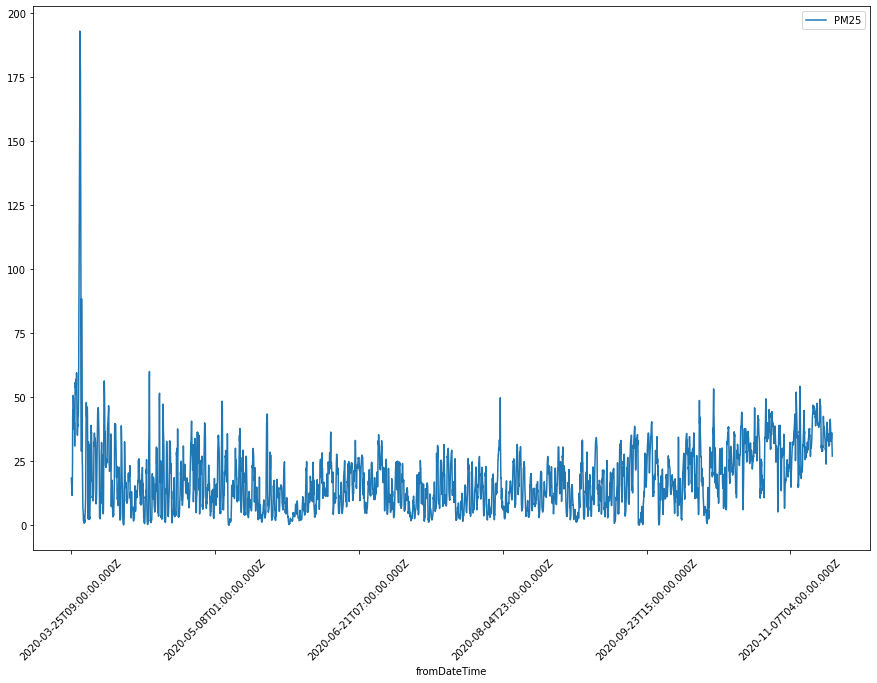

In [174]:
import matplotlib
import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(20, 6), dpi=800, facecolor='w', edgecolor='k')
matplotlib.rcParams['figure.figsize'] = [15, 10]

df.plot(y='PM25', x='fromDateTime')
plt.xticks(rotation=45)
plt.savefig('render.png')

plt.show()



In [177]:
type(df['fromDateTime'][0])

str

In [267]:
df['fromDateTime']= pd.to_datetime(df['fromDateTime'])

In [268]:
type(df['fromDateTime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [181]:
df.head()


,fromDateTime,HUMIDITY,PM1,PM10,PM25,PRESSURE,TEMPERATURE
0,2020-03-25 09:00:00+00:00,41.09,13.98,24.70,18.38,1038.77,6.12
1,2020-03-25 10:00:00+00:00,36.25,13.16,22.86,17.24,1037.93,8.82
2,2020-03-25 11:00:00+00:00,34.07,12.78,22.64,16.86,1037.03,10.05
3,2020-03-25 12:00:00+00:00,32.27,11.15,19.56,14.56,1036.33,11.00
4,2020-03-25 13:00:00+00:00,29.70,9.98,16.74,12.69,1035.68,11.65


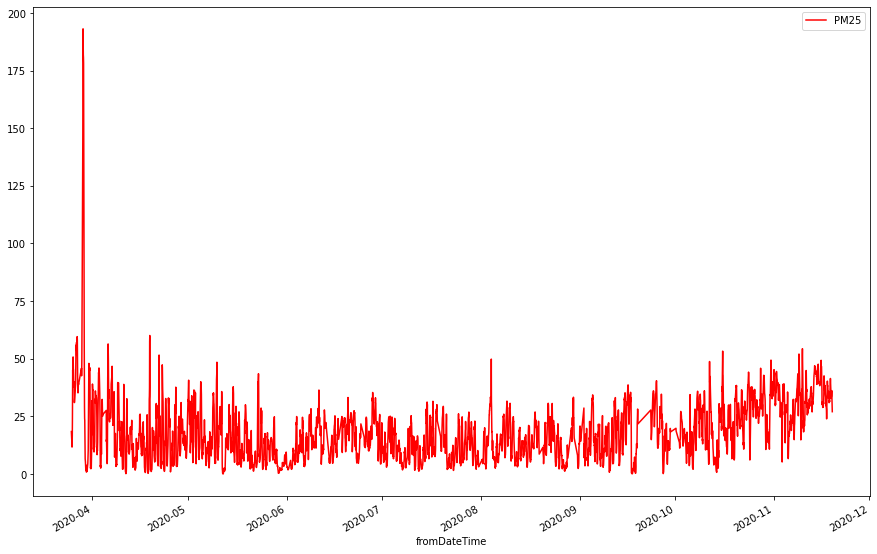

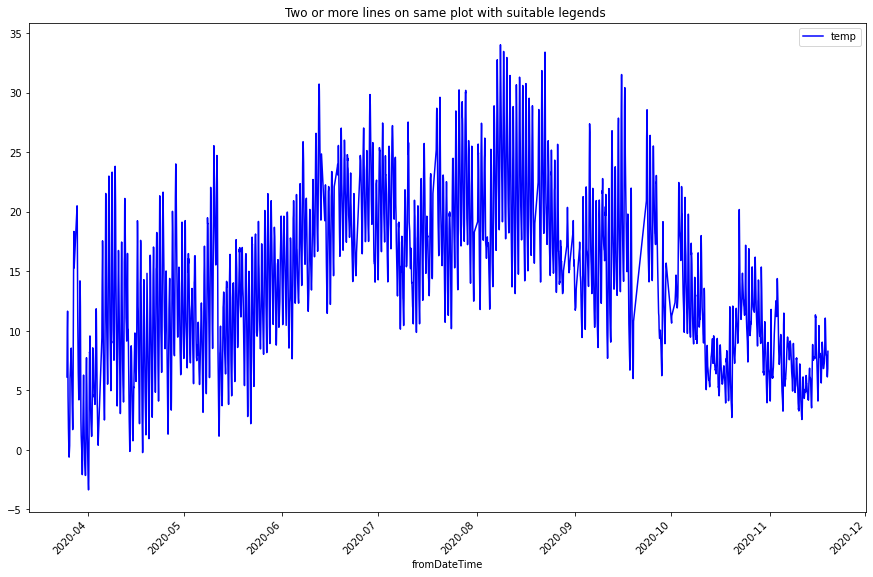

In [194]:
matplotlib.rcParams['figure.figsize'] = [15, 10]


df.plot(y='PM25', x='fromDateTime', color='red', label ='PM25')
plt.savefig('render.png')
df.plot(y='TEMPERATURE', x='fromDateTime', color='blue', label ='temp')
plt.title('Two or more lines on same plot with suitable legends ')
plt.xticks(rotation=45)
# show a legend on the plot
plt.legend()


plt.show()

In [223]:
type(df['fromDateTime'][0])
one_day = df[(df['fromDateTime'] > '2020-09-23') & (df['fromDateTime'] < '2020-09-24')]
one_day


,fromDateTime,HUMIDITY,PM1,PM10,PM25,PRESSURE,TEMPERATURE
3993,2020-09-23 08:00:00+00:00,67.57,20.00,40.79,27.74,1010.18,20.92
3994,2020-09-23 09:00:00+00:00,57.00,17.58,34.49,24.20,1009.36,24.25
3995,2020-09-23 10:00:00+00:00,50.79,16.13,29.90,21.88,1008.88,26.28
3996,2020-09-23 11:00:00+00:00,46.09,14.32,25.10,18.80,1008.70,27.23
3997,2020-09-23 12:00:00+00:00,43.30,12.00,19.49,14.87,1008.20,28.24
3998,2020-09-23 13:00:00+00:00,41.34,12.63,20.79,15.78,1007.84,28.57
3999,2020-09-23 14:00:00+00:00,41.09,12.99,21.39,16.23,1007.63,27.90
4000,2020-09-23 15:00:00+00:00,42.10,14.17,23.87,18.04,1008.09,25.33
4001,2020-09-23 16:00:00+00:00,47.34,15.47,27.04,20.20,1008.06,23.26
4002,2020-09-23 17:00:00+00:00,55.55,16.77,30.43,22.44,1007.86,21.15


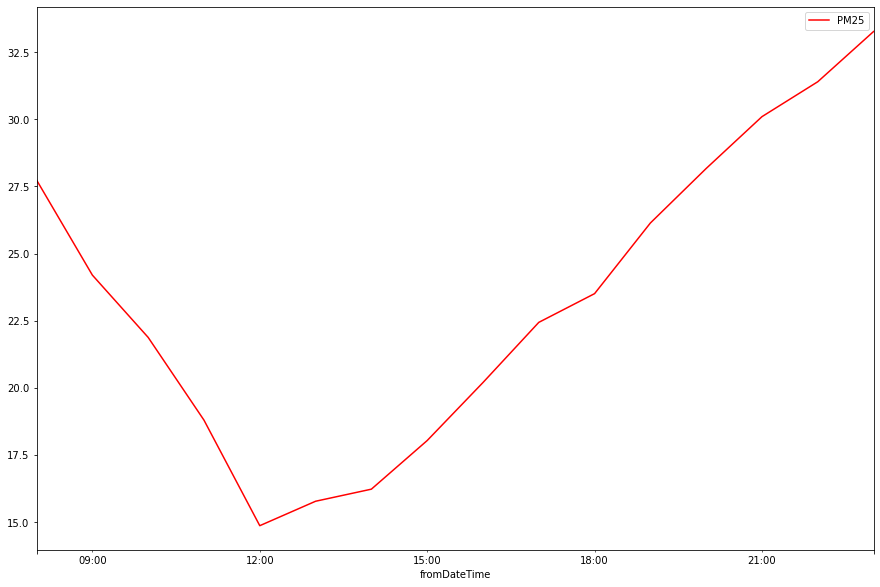

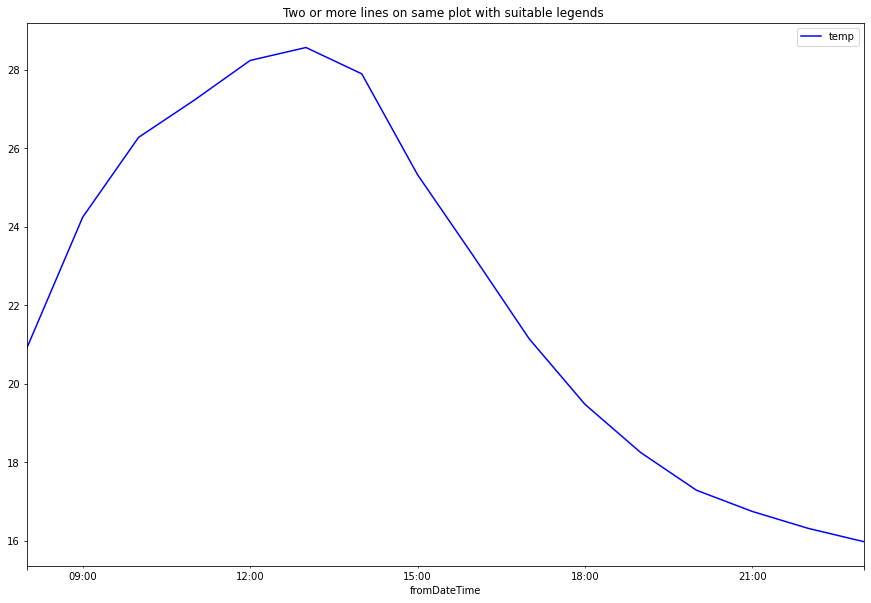

In [224]:
matplotlib.rcParams['figure.figsize'] = [15, 10]


one_day.plot(y='PM25', x='fromDateTime', color='red', label ='PM25')
plt.savefig('render.png')
one_day.plot(y='TEMPERATURE', x='fromDateTime', color='blue', label ='temp')
plt.title('Two or more lines on same plot with suitable legends ')
plt.xticks(rotation=45)
# show a legend on the plot
plt.legend()


plt.show()

# LINER REGRESION

#### ŷ = β0 + β1 * x1 + β2 * x2 + ... + β(p-n) x(p-n) + Ε


In [269]:
df['fromDateTime'] = df['fromDateTime'].apply(lambda x:x.value)
df.head()

,fromDateTime,HUMIDITY,PM1,PM10,PM25,PRESSURE,TEMPERATURE
0,1585126800000000000,41.09,13.98,24.70,18.38,1038.77,6.12
1,1585130400000000000,36.25,13.16,22.86,17.24,1037.93,8.82
2,1585134000000000000,34.07,12.78,22.64,16.86,1037.03,10.05
3,1585137600000000000,32.27,11.15,19.56,14.56,1036.33,11.00
4,1585141200000000000,29.70,9.98,16.74,12.69,1035.68,11.65


In [270]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df.drop(['PM25', 'PM1', 'PM10' ], axis=1)
y = df['PM25']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [271]:
X_train

,fromDateTime,HUMIDITY,PRESSURE,TEMPERATURE
3630,1599195600000000000,87.28,1022.60,11.72
846,1588345200000000000,92.68,1003.50,13.82
324,1586466000000000000,66.58,1022.69,10.21
1803,1591840800000000000,100.00,1008.91,16.22
3664,1599318000000000000,68.99,1013.22,24.63
...,...,...,...,...
3916,1600225200000000000,99.43,1020.85,14.37
1283,1589918400000000000,91.21,1018.90,10.11
3714,1599498000000000000,71.72,1023.55,15.70
3325,1597752000000000000,54.46,1006.75,28.46


In [272]:
y_train

3630    20.32
846     31.51
324      8.63
1803    35.11
3664    12.51
        ...  
3916    37.89
1283     9.15
3714     8.71
3325    15.38
1414     8.62
Name: PM25, Length: 4234, dtype: float64

In [277]:
# instantiate the regressor class
regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("Score: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f µg/m³" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f µg/m³" % median_absolute_error(y_test, prediction))

Score: 0.13
The Mean Absolute Error: 8.30 µg/m³
The Median Absolute Error: 6.77 µg/m³


In [297]:
X_test1 = X_test.reset_index()
now_wether = X_test1.head(1).to_dict()

a

{'index': {0: 5092},
 'fromDateTime': {0: 1605052800000000000},
 'HUMIDITY': {0: 85.0},
 'PRESSURE': {0: 1032.97},
 'TEMPERATURE': {0: 3.23}}

In [333]:
params = (
    ('id', '756135'),
    ('units', 'metric'),
    ('appid', '439d4b804bc8187953eb36d2a8c26a02'),
)

response = requests.get('https://openweathermap.org/data/2.5/weather', headers=headers, params=params, cookies=cookies)


In [337]:
resp_json = response.json()
resp_json['main']
temp = resp_json['main']['temp']
pressure = resp_json['main']['pressure']
humidity = resp_json['main']['humidity']
t_now = pd.to_datetime(datetime.now()).value

temp_list = [{'fromDateTime':t_now, 'HUMIDITY':humidity,'PRESSURE': pressure, 'TEMPERATURE':temp}]
current_parameter =  pd.DataFrame(temp_list)
current_parameter

,fromDateTime,HUMIDITY,PRESSURE,TEMPERATURE
0,1605888149636608000,74,1027,3.97


In [342]:
pred_now = regressor.predict(current_parameter)
print(f'Prediction PM 2,5 for now is {int(pred_now[0])} µg/m')

Prediction PM 2,5 for now is 28 µg/m


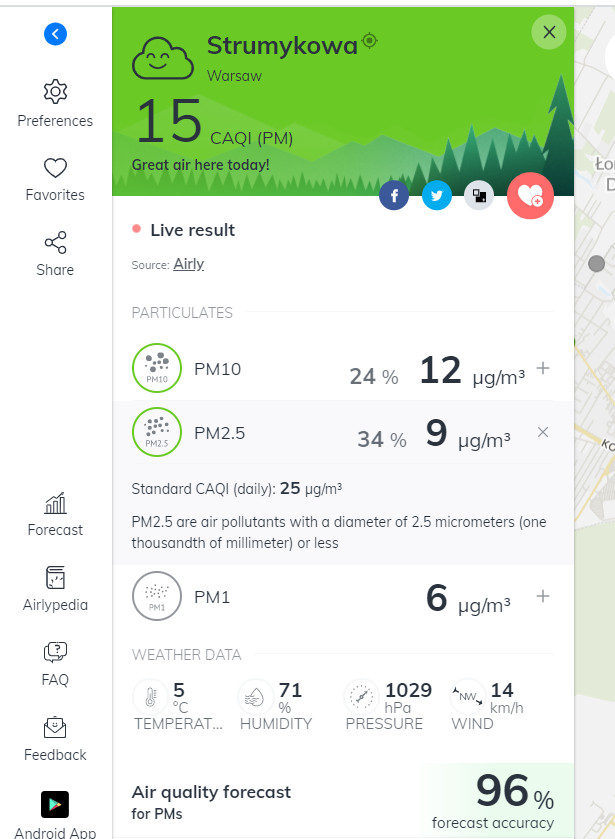

In [345]:
from IPython.display import Image
Image("pogoda_teraz.png")